In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("prepocessed_10k.csv")

In [213]:
df.head()

,Unnamed: 0,index,url,book_id,title,award_count,author,avg_rating,num_reviews,num_ratings,num_pages,original_publish_year,series,genres,awards,place,minmax_norm_ratings,normalise_mean
0,0,0,https://www.goodreads.com/book/show/90761.Legs,90761.0,Legs,0,William Kennedy,3.80,1688,1688,320,1975.0,True,"Fiction, Historical, Historical Fiction, Myste...",NaN,NaN,8.212329,5.117169
1,1,1,https://www.goodreads.com/book/show/12019355-i...,12019355.0,Infamous,0,Sherrilyn Kenyon,4.35,19044,19044,468,2012.0,True,"Young Adult, Fantasy, Paranormal, Fantasy, Fan...",NaN,"New Orleans, Louisiana",9.059932,5.964772
2,2,2,https://www.goodreads.com/book/show/9415957-i-...,9415957.0,I'll Be There,4,Holly Goldberg Sloan,4.01,8034,8034,392,2011.0,True,"Young Adult, Romance, Contemporary, Realistic ...",Milwaukee County Teen Book Award Nominee (2012...,NaN,8.535959,5.440799
3,3,3,https://www.goodreads.com/book/show/24641800-t...,24641800.0,The Demon in the Wood,0,Leigh Bardugo,3.95,16914,16914,30,2014.0,True,"Fantasy, Young Adult, Short Stories, Novella, ...",NaN,NaN,8.443493,5.348334
4,4,4,https://www.goodreads.com/book/show/33865643-t...,33865643.0,The War I Finally Won,1,Kimberly Brubaker Bradley,4.48,25187,25187,387,2017.0,True,"Historical, Historical Fiction, Childrens, Mid...",Goodreads Choice Award Nominee for Middle Grad...,NaN,9.260274,6.165115


In [50]:
#The most reviewed books 
mostly_reviewed = df.sort_values(by='num_reviews', ascending=False) # Sorting by number of reviews
mostly_reviewed = mostly_reviewed[['title','num_reviews']] # Selecting just the columns we want
mostly_reviewed = mostly_reviewed.head(15) # Choosing only the top 10 books

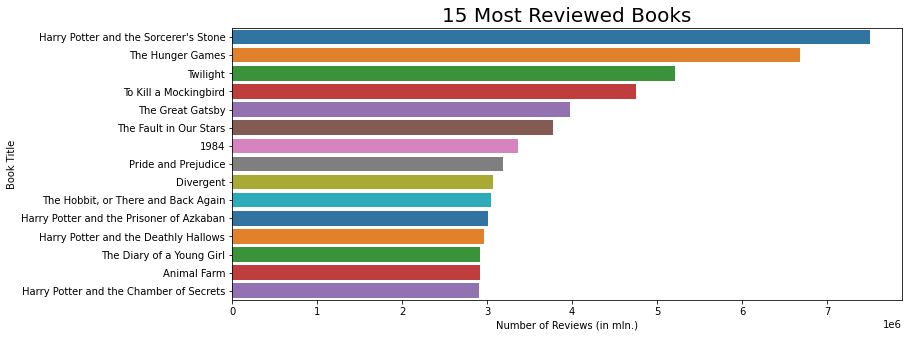

In [51]:
# The 15 mostly reviewed books
plt.figure(figsize=(12,5))
sb.barplot(y='title', x='num_reviews', data = mostly_reviewed, palette="tab10")
plt.title('15 Most Reviewed Books', fontsize='20')
plt.xlabel('Number of Reviews (in mln.)')
plt.ylabel('Book Title')

plt.show()

In [10]:
pip install sweetviz

In [11]:
import sweetviz as sv
import IPython as ip
x=df.drop('title',axis=1)
y=df['title']
analyze_report = sv.analyze(df)
analyze_report.show_html('analyze.html', open_browser=False)
ip.display.HTML('analyze.html')

<AxesSubplot:xlabel='num_pages', ylabel='num_ratings'>

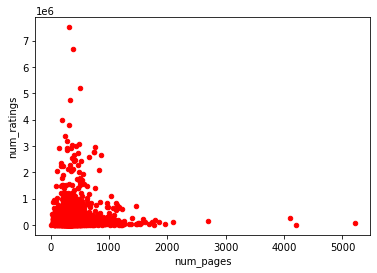

In [23]:
df.plot.scatter(x='num_pages',y='num_ratings',c="red")

In [60]:
# 2. Can you compute numerically the correlation coefficient of these two columns? (between pages and num_rating)
corr_pages_review = df.corr().loc['num_pages','num_ratings']
print (f"Correlation between number of pages and rating is {round(corr_pages_review,5)}")



Correlation between number of pages and rating is -0.02787


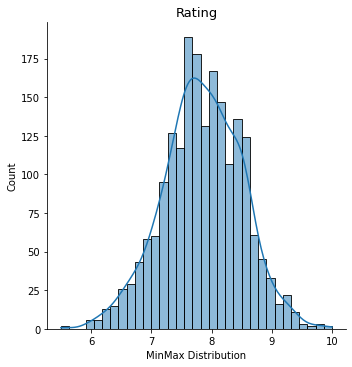

In [134]:
# 4. Visualise the minmax_norm_rating distribution.

sns.displot(df, x="minmax_norm_ratings", kde=True, fill=True)
plt.title('Normalised Min/Max', fontsize='13')
plt.xlabel('Rating')
plt.show()

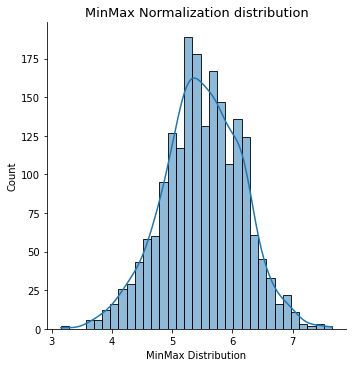

In [139]:

sns.displot(df, x="normalise_mean", kde=True, fill=True)
plt.title('MinMax Normalization distribution', fontsize='13')
plt.xlabel('MinMax Distribution')
plt.show()

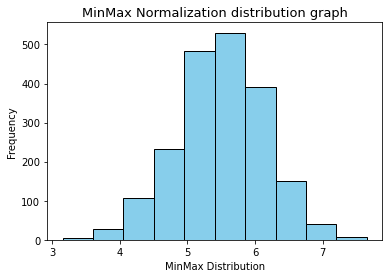

In [106]:
#A) Frequency distribution 

df['normalise_mean'].hist(ec='black', color='skyblue')
plt.ylabel('Frequency')
plt.title('MinMax Normalization distribution graph', fontsize='13')
plt.xlabel('MinMax Distribution')
plt.grid(False)
plt.show()

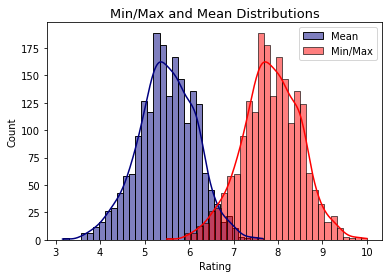

In [138]:
# 6. Create one graph that represents in the same figure both `minmax_norm_rating` and `mean_norm_rating`distributions.
sns.histplot(data=df, x="normalise_mean", color="navy", label="Mean", kde=True)
sns.histplot(data=df, x="minmax_norm_ratings", color="red", label="Min/Max", kde=True)
plt.xlabel('Rating')
plt.title('Min/Max and Mean Distributions', fontsize='13')
plt.legend(loc=1) 
plt.show()

In [ ]:
# aggregate bars

<function matplotlib.pyplot.show(close=None, block=None)>

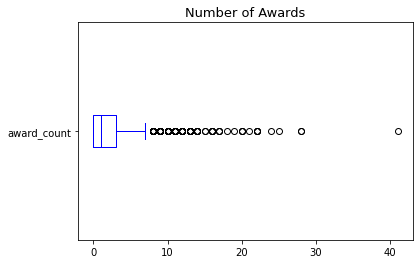

In [203]:
#8. Visualize the `awards` distribution in a **boxplot** and **aggregated bars**. Decide which of these representations gives us more information and in which cases they should be used.

#boxplot

df[['award_count']].plot.box(vert=False, color='blue')

plt.title('Number of Awards', fontsize='13')
plt.show

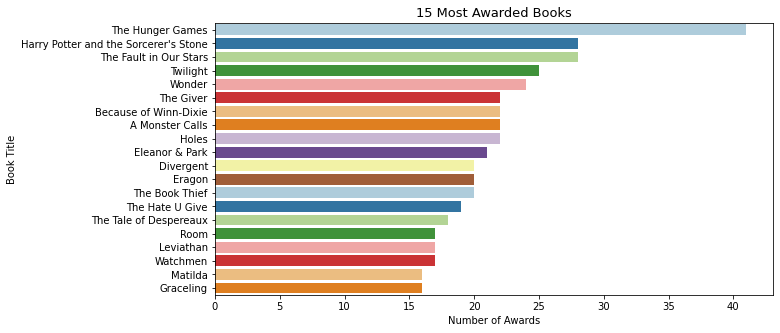

In [205]:
most_awards = df.sort_values(by='award_count', ascending=False)
most_awards=  most_awards[['title','award_count']] 
most_awards = most_awards.head(20)


plt.figure(figsize=(10,5))
sns.barplot(y='title', x='award_count', data = most_awards, palette="Paired")
plt.title('15 Most Awarded Books', fontsize='13')
plt.xlabel('Number of Awards')
plt.ylabel('Book Title')
plt.show()

10. Make a scatterplot to represent  `minmax_norm_ratings` in function of the number of awards won by the book.
    - Is there another representation that displays this in a more clear manner?
    - Optional: Can you plot a best fit linear regression line to represent the relationship?

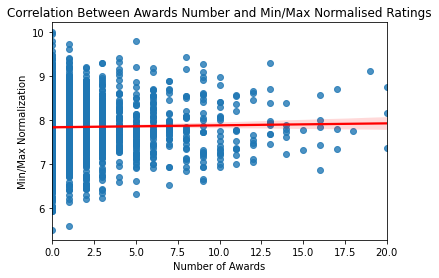

In [199]:
# 10. Make a scatterplot to represent  minmax_norm_ratings in function of the number of awards won by the book
#- Is there another representation that displays this in a more clear manner?
#- Optional: Can you plot a best fit linear regression line to represent the relationship?

def cor_award_minmax (df):
    sns.regplot(x = "award_count", y = "minmax_norm_ratings", line_kws={"color": "red"}, data = df)
    plt.xlim(0,20)
    plt.title('Correlation Between Awards Number and Min/Max Normalised Ratings', fontsize='12')
    plt.xlabel('Number of Awards')
    plt.ylabel('Min/Max Normalization')
    plt.show()
cor_award_minmax (df)




<Figure size 864x360 with 0 Axes>

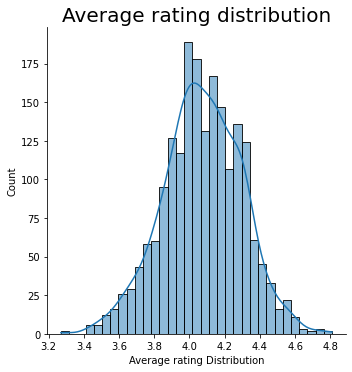

In [196]:
def avg_rating_dist(df):
    plt.figure(figsize=(12,5))
    sns.displot(df, x="avg_rating", kde=True, fill=True)
    plt.title('Average rating distribution', fontsize='20')
    plt.xlabel('Average rating Distribution')
    plt.show()
avg_rating_dist(df)

<AxesSubplot:xlabel='minmax_norm_ratings', ylabel='award_count'>

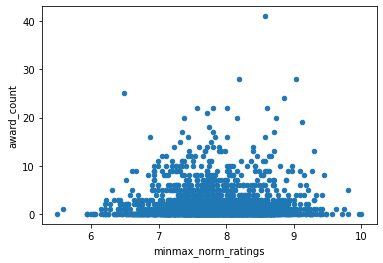

In [193]:
df.plot.scatter(y = "award_count", x = "minmax_norm_ratings")

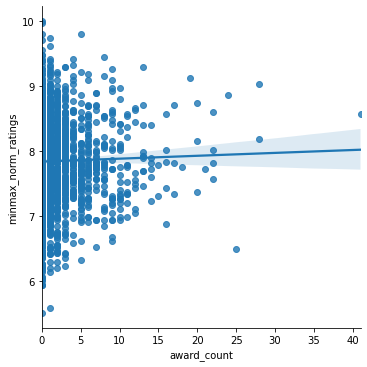

In [174]:
sb.lmplot(x = "award_count",
            y = "minmax_norm_ratings", 
          
            data = df)

In [215]:
df.head()

,Unnamed: 0,index,url,book_id,title,award_count,author,avg_rating,num_reviews,num_ratings,num_pages,original_publish_year,series,genres,awards,place,minmax_norm_ratings,normalise_mean
0,0,0,https://www.goodreads.com/book/show/90761.Legs,90761.0,Legs,0,William Kennedy,3.80,1688,1688,320,1975.0,True,"Fiction, Historical, Historical Fiction, Myste...",NaN,NaN,8.212329,5.117169
1,1,1,https://www.goodreads.com/book/show/12019355-i...,12019355.0,Infamous,0,Sherrilyn Kenyon,4.35,19044,19044,468,2012.0,True,"Young Adult, Fantasy, Paranormal, Fantasy, Fan...",NaN,"New Orleans, Louisiana",9.059932,5.964772
2,2,2,https://www.goodreads.com/book/show/9415957-i-...,9415957.0,I'll Be There,4,Holly Goldberg Sloan,4.01,8034,8034,392,2011.0,True,"Young Adult, Romance, Contemporary, Realistic ...",Milwaukee County Teen Book Award Nominee (2012...,NaN,8.535959,5.440799
3,3,3,https://www.goodreads.com/book/show/24641800-t...,24641800.0,The Demon in the Wood,0,Leigh Bardugo,3.95,16914,16914,30,2014.0,True,"Fantasy, Young Adult, Short Stories, Novella, ...",NaN,NaN,8.443493,5.348334
4,4,4,https://www.goodreads.com/book/show/33865643-t...,33865643.0,The War I Finally Won,1,Kimberly Brubaker Bradley,4.48,25187,25187,387,2017.0,True,"Historical, Historical Fiction, Childrens, Mid...",Goodreads Choice Award Nominee for Middle Grad...,NaN,9.260274,6.165115


AttributeError: module 'matplotlib.pyplot' has no attribute 'edgecolor'

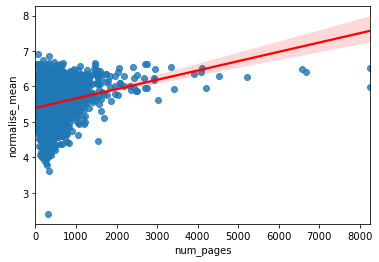

In [264]:
#Correlation between page numbers and rankings (normalise_mean)
def corr_page_rank(df):
    sns.regplot(x = "num_pages", y = "normalise_mean",line_kws={"color": "red"}, data = df)


    plt.xlim(-10,1500)
    #plt.ylim(3,8)
    plt.title('Correlation Between Page Numbers and Ranking', fontsize='15')
    plt.xlabel('Page numbers')
    plt.ylabel('Rank')
    plt.show()
corr_page_rank(df)
    

(3.5, 7.0)

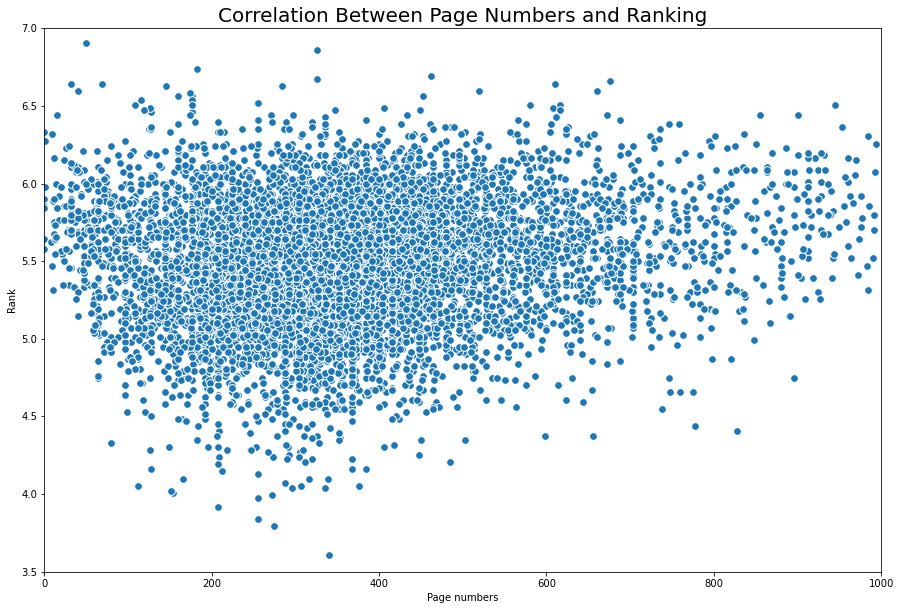

In [267]:
df.plot.scatter(x = "num_pages", y = "normalise_mean",figsize=(15,10),s=60,ec='white')
plt.title('Correlation Between Page Numbers and Ranking', fontsize='20')
plt.xlabel('Page numbers')
plt.ylabel('Rank')
plt.xlim(-0,1000)
plt.ylim(3.5,7)

In [55]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr

,Unnamed: 0,index,book_id,award_count,avg_rating,num_reviews,num_ratings,num_pages,original_publish_year,series,normalise_mean
Unnamed: 0,1.000000,0.999997,0.052113,-0.053393,-0.009618,-0.096868,-0.096868,-0.035919,0.016994,0.005347,-0.009618
index,0.999997,1.000000,0.052139,-0.053340,-0.009579,-0.096952,-0.096952,-0.035891,0.016995,0.005242,-0.009579
book_id,0.052113,0.052139,1.000000,0.039807,0.234458,-0.030889,-0.030889,-0.045680,0.119193,0.044181,0.234458
award_count,-0.053393,-0.053340,0.039807,1.000000,0.023486,0.420415,0.420415,-0.004616,0.100087,0.034018,0.023486
avg_rating,-0.009618,-0.009579,0.234458,0.023486,1.000000,0.048319,0.048319,0.235291,0.097340,0.132085,1.000000
num_reviews,-0.096868,-0.096952,-0.030889,0.420415,0.048319,1.000000,1.000000,-0.027872,0.009977,0.016422,0.048319
num_ratings,-0.096868,-0.096952,-0.030889,0.420415,0.048319,1.000000,1.000000,-0.027872,0.009977,0.016422,0.048319
num_pages,-0.035919,-0.035891,-0.045680,-0.004616,0.235291,-0.027872,-0.027872,1.000000,0.006785,0.150504,0.235291
original_publish_year,0.016994,0.016995,0.119193,0.100087,0.097340,0.009977,0.009977,0.006785,1.000000,0.099842,0.097340
series,0.005347,0.005242,0.044181,0.034018,0.132085,0.016422,0.016422,0.150504,0.099842,1.000000,0.132085


In [209]:

high_rating = df.sort_values(by='avg_rating', ascending=False)
high_rating=  high_rating[['author','avg_rating']] 
high_rating = high_rating.head(20)

In [211]:
author_list= list(df['author'].unique())

ratings1= []
ratings2= []
for i in author_list:
    
    x = df[high_rating['author']==i]
    ratings1.append(sum(x.R1)/len(x))
    ratings2.append(sum(x.R2)/len(x))
    
f,ax = plt.subplots(figsize = (5,8))
sns.barplot(x=ratings1,y=author_list,color='green',alpha = 0.5,label='Rating1' )
sns.barplot(x=ratings2,y=author_list,color='blue',alpha = 0.5,label='Rating2' )
ax.legend(loc='lower right',frameon = True)   
ax.set(xlabel='Percentage of Ratings', ylabel='Authors',title = "Percentage of Ratings According to Authors ")
plt.show()

<ipython-input-211-fc86819e0b08>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = df[high_rating['author']==i]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [141]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='df',
            annot=True,
            linewidth=0.5)

ValueError: 'df' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'